# Business Intelligence for Thrift Stores

## Data description
 
Our objective here is to perform a statistical analysis that will help a newly opened thrift store to make efficient and profitful businesses decisions. Data analysis will be done through the following steps:

1. Data cleaning
2. Exploratory data analysis
3. Natural Language Processing (NLP)

That are three different Thrift Stores: A, B and C. 

For didactic purposes, the abovementioned steps will be somewhat shuffled midway to give the logical perspective of the data analysis. Firstly, we will clear the data and explore the Thrift Store B dataset. Only after going through Thrift Store B, we will go for Thrift Stores A and C. Then, we will evaluate the data holistically and take (1) broad conclusions for the thrift store market and (2) specific conclusions for each thrift store.

In [3]:
#Import libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from altair import *

The dataset does not have a `README.txt` file, so we will have to infer most of the meaning of the columns.

Let's have a quick overview at all three thrift stores, to see if their components and columns match. Let' also check whether the datasets can be integrated with each other.

In [5]:
#import Thrift Store A
thrift_a=pd.read_csv("C:/Users/Pedro/Documents/Python Scripts/Thrift stores/fixed typos/Thrift_Store_A.csv", sep=";", encoding='ISO-8859-1')
print(thrift_a)

          id                marca                nomeDaPeca  precoComDesconto  \
0      21244  D&g Dolce & Gabbana      Óculos Lente Azulada             320.0   
1       9981             Givenchy          Bolsa Coral Saco            2050.0   
2      84176            Joe Fresh       Camisa Xadrez Verde              63.0   
3      47475                Mixed   Calça Alfaiataria Preta             140.0   
4      74864                 Zara     Vestido Jeans Babados              60.0   
...      ...                  ...                       ...               ...   
56656   6109                Mixed        Camiseta Bothanica             207.0   
56657  70968                Mixed          Blusa Seda Preta             190.0   
56658  86400       Toca do Coelho      Body Verde Palmeiras              40.0   
56659  87138         Bazar Genial  Babador Atoalhado Branco              12.0   
56660   9561                 Farm     Saia Recortes Estampa              75.0   

       precoSemDesconto    

In [4]:
#import Thrift Store B
thrift_b=pd.read_csv("C:/Users/Pedro/Documents/Python Scripts/Thrift stores/fixed typos/Thrift_Store_B.csv", sep=";", encoding='ISO-8859-1')
print(thrift_b)

          id        marca  precoComDesconto  precoSemDesconto  \
0      24427       nativa             49.99            100.00   
1      60509          mob            139.97            449.90   
2      42602         farm             74.70            249.00   
3      41552   pure knite             25.25            135.00   
4      60624         zara             26.21            189.90   
...      ...          ...               ...               ...   
60290  50079  clock house             27.20             80.00   
60291  38714        magia             21.48             85.90   
60292  41740         zara             27.00             89.99   
60293  35819      oshkosh             10.00             29.99   
60294  74181   forever 21             29.44            117.75   

                                               Descricao Tamanho  \
0      Sandália anabela de tecido laminado vazado, fe...      37   
1      Vestido camisa xadrez, com mangas 7/8. Bolsos ...       m   
2      Vestido 

In [7]:
#Import Thrift Store C
thrift_c=pd.read_csv("C:/Users/Pedro/Documents/Python Scripts/Thrift stores/fixed typos/Thrift_Store_C.csv", sep=";", encoding='ISO-8859-1')
print(thrift_c)

         id           marca                     nomeDaPeca  precoComDesconto  \
0     22701       Taverniti        Jaqueta Jeans Taverniti             199.0   
1     22703       Sem Marca      Camisa Estampada Colorida             129.0   
2     22705   Robert Pierre          Bermuda Robert Pierre              49.0   
3     22442  Croft & Barrow  Camisa Vintage Croft & Barrow             129.0   
4     22443          Boo Jo          Camisa Vintage Boo Jo             129.0   
...     ...             ...                            ...               ...   
1915  14291         Lay Out                 Camisa Lay Out              25.0   
1916  22486         Puritan      Camisa Vermelha Estampada             129.0   
1917  22491    Falls Creack    Camisa Vintage Falls Creeck             129.0   
1918  22496       Sem Marca         Blusão Bomber Colorido             199.0   
1919  22498       Sem Marca     Bomber Jacket Candy Colors             249.0   

      precoSemDesconto                 

In [8]:
#Display column names
print(thrift_a.columns)
print(thrift_b.columns)
print(thrift_c.columns)

Index(['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto',
       'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Disponível', 'Data',
       'Status'],
      dtype='object')
Index(['id', 'marca', 'precoComDesconto', 'precoSemDesconto', 'Descricao',
       'Tamanho', 'Condicao', 'Cores', 'Composicao', 'Medidas', 'Disponível',
       'Data', 'Status', 'PalavraChave1', 'PalavraChave2', 'PalavraChave3',
       'PalavraChave4', 'PalavraChave5', 'PalavraChave6', 'PalavraChave7',
       'PalavraChave8'],
      dtype='object')
Index(['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto',
       'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Disponível', 'Data',
       'Status'],
      dtype='object')


# What are our first impressions?
                                                                
- `id`: Number of identification.                      
- `marca`: *Brand*.
- `nomeDaPeca`: *Name of the piece of clothing*. It is a full sentence describing in a few words the pieces of clothing in Thrift Stores A and C. Thrift Store B dataset is lacking the `nomeDaPeca` field. 
- `precoComDesconto`: *Discount price*. Currency in reais.
- `precoSemDesconto`: *Full price (without discount)*. Currency in reais.
- `Descricao`: *Description*. Detailed description of the object being sold. It might contain whether it has pockets, where it was brought, some measuments, whether there are defects in the piece, what kind of cloth it was made of, and so on.
- `Tamanho`: *Size*. In characters (PP, P, M, G, GG) and numbers (38, 39, 40...) depending on the type of clothing.
- `Condicao`: *Condition*. For Thrift Stores A and B, it states whether the piece is new or used, and if used, *how* used. In Thrift Store C, the whole column reads `Vintage` (which does not seem to be useful).
- `Cores`: *Colours*. In Thrift Store A, the column seems to correctly express the colour of the pieces. In Thrift Store B, the column seems to be correctly filled by the corresponding colour of the pieces of clothing. In Thrift Store C, the column is empty.
- `Disponível`: *Available.* It states whether the item is `DISPONíVEL` (available) or `VENDIDO` (sold).
- `Data`: (*Date*). Turns out to be a non-sensical field, since it does not seem to refer to any common data terminology. It will not be useful.
- `Status`: For all items, it states a standard `VERIFICADO` (verified), probably meaning that the data input was inserted into the database.
- `PalavraChave`. *Keyword*. It apparently corresponds to the dismemberment of a full descriptive sentence regarding the product being sold, with the multiple instances of `PalavraChave1`, 2, 3, and so on, being able to be understood if fully merged in one sentence.


## 1. Data cleaning 
### Thrift B

Multiple `PalavraChave`s (keywords) fields are present at Thrift Store B and the combination of these should be stored as a nomeDaPeca column.
These multiple `PalavraChave`s (*keywords*) seem to aggregate to full sentences that would be properly placed under the "nomeDaPeca" field. In portuguese, nouns are generally the first word in the sentence, while adjectives come later. From these keywords, we can establish semantically that the first word of these keywords ("PalavraChave1") would be a noun. On the other hand, this syntax would not be possible in English, in which adjectives come first, and the noun varies as a first, second or third word; which would make our work harder.

Therefore, given that most of these points revolve around Thrift Store B, we will start from there.

It should be acknowledged that there were incongruencies given the special characters used in portuguese - such as á, ã, ç, ó, õ, é, and so on - that were changed to code in the original dataset. Since I'm a native portuguese speaker, I did a prior data cleaning on all datasets by fixing the special characters back to their accentuated forms using the "Find" tool in Excel. Other systematic typos were also corrected via Excel. 
On future analyses, I probably won't shy away from using Excel again for exploring the data at the beggining of the analysis, especially in cases such that the problem isn't so complex and the dataset is easy to survey.

In [9]:
#create a new column for 'nomeDaPeca' by summing up multiple PalavraChave columns
thrift_b_nome = thrift_b[['PalavraChave1', 'PalavraChave2', 'PalavraChave3', 'PalavraChave4', 'PalavraChave5', 'PalavraChave6', 'PalavraChave7', 'PalavraChave8']].copy()
thrift_b_nome2 = thrift_b_nome.stack().groupby(level=0).apply(' '.join).to_frame('nomeDaPeca')
print(thrift_b_nome)
print(thrift_b_nome2)

      PalavraChave1 PalavraChave2 PalavraChave3 PalavraChave4 PalavraChave5  \
0           Anabela          Laço       Laranja                               
1           Vestido        Camisa        Xadrez           Mob                 
2           Vestido         Verde       Militar          Farm                 
3            Colete            de        Crochê        Marrom         Claro   
4           Vestido       Laranja           com      Bolinhas         Azuis   
...             ...           ...           ...           ...           ...   
60290         Calça         Jeans        Skinny         Clock         House   
60291       Vestido         Longo        Floral         Magia                 
60292        Camisa        Branca          Zara                               
60293      Camiseta      Infantil        Raglan                               
60294         Blusa         Verde       Forever            21                 

      PalavraChave6 PalavraChave7 PalavraChave8  
0

In [10]:
#Check whether these are compatible row numbers, so we can merge both dataframes
print(thrift_b.shape)
print(thrift_b_nome.shape)

(60295, 21)
(60295, 8)


In [11]:
# Add "nomeDaPeca" as a new column
thrift_b_nome2['nomeDaPeca'].values
thrift_b['nomeDaPeca'] = thrift_b_nome2['nomeDaPeca']

#rearranging columns so that 'nomeDaPeca' can be at 3rd place, instead of the last
thrift_b = thrift_b[['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto', 'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Composicao', 'Medidas', 'Disponível', 'Data', 'Status', 'PalavraChave1', 'PalavraChave2', 'PalavraChave3', 'PalavraChave4', 'PalavraChave5', 'PalavraChave6', 'PalavraChave7', 'PalavraChave8']]
print(thrift_b.columns)

Index(['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto',
       'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Composicao', 'Medidas',
       'Disponível', 'Data', 'Status', 'PalavraChave1', 'PalavraChave2',
       'PalavraChave3', 'PalavraChave4', 'PalavraChave5', 'PalavraChave6',
       'PalavraChave7', 'PalavraChave8'],
      dtype='object')


### Data cleaning: Thrift Stores A and C

Now that we have surveyed a bit of the Thrift B dataset, we shall evaluate Thrift Stores A and C.
It will be interesting to merge all three datasets for further analyses. To do this, we will have to create a similar-sized matrix for all datasets. Let's recapitulate the shape of each dataset to see what needs to be done.

In [22]:
print(thrift_a.shape)
print(thrift_b.shape)
print(thrift_c.shape)

print(thrift_a.columns)
print(thrift_b.columns)
print(thrift_c.columns)


(56661, 12)
(60295, 23)
(1920, 12)
Index(['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto',
       'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Disponível', 'Data',
       'Status'],
      dtype='object')
Index(['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto',
       'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Composicao', 'Medidas',
       'Disponível', 'Data', 'Status', 'PalavraChave1', 'PalavraChave2',
       'PalavraChave3', 'PalavraChave4', 'PalavraChave5', 'PalavraChave6',
       'PalavraChave7', 'PalavraChave8', 'Desconto'],
      dtype='object')
Index(['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto',
       'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Disponível', 'Data',
       'Status'],
      dtype='object')


Thrift Stores A and C lack all PalavraChave (keywords) fields. To fill those new columns, we shall dismember the nomeDaPeca (piece of clothing) field from each, in a process that is precisely the inverse of what we have done previously for the Thrift B dataset.

In [23]:
#I would have to pick 'nomeDaPeca' and dismember it in multiple 'PalavraChaveX'.
new_list = thrift_a['nomeDaPeca'].apply(lambda x : pd.Series(x.split(' ')))
print(new_list)

              0            1          2    3    4    5    6
0        Óculos        Lente    Azulada  NaN  NaN  NaN  NaN
1         Bolsa        Coral       Saco  NaN  NaN  NaN  NaN
2        Camisa       Xadrez      Verde  NaN  NaN  NaN  NaN
3         Calça  Alfaiataria      Preta  NaN  NaN  NaN  NaN
4       Vestido        Jeans    Babados  NaN  NaN  NaN  NaN
...         ...          ...        ...  ...  ...  ...  ...
56656  Camiseta    Bothanica        NaN  NaN  NaN  NaN  NaN
56657     Blusa         Seda      Preta  NaN  NaN  NaN  NaN
56658      Body        Verde  Palmeiras  NaN  NaN  NaN  NaN
56659   Babador    Atoalhado     Branco  NaN  NaN  NaN  NaN
56660      Saia     Recortes    Estampa  NaN  NaN  NaN  NaN

[56661 rows x 7 columns]


In [24]:
new_list2= thrift_c['nomeDaPeca'].apply(lambda x : pd.Series(x.split(' ')))
print(new_list2)

            0          1          2       3       4    5    6
0     Jaqueta      Jeans  Taverniti     NaN     NaN  NaN  NaN
1      Camisa  Estampada   Colorida     NaN     NaN  NaN  NaN
2     Bermuda     Robert     Pierre     NaN     NaN  NaN  NaN
3      Camisa    Vintage      Croft       &  Barrow  NaN  NaN
4      Camisa    Vintage        Boo      Jo     NaN  NaN  NaN
...       ...        ...        ...     ...     ...  ...  ...
1915   Camisa        Lay        Out     NaN     NaN  NaN  NaN
1916   Camisa   Vermelha  Estampada     NaN     NaN  NaN  NaN
1917   Camisa    Vintage      Falls  Creeck     NaN  NaN  NaN
1918   Blusão     Bomber   Colorido     NaN     NaN  NaN  NaN
1919   Bomber     Jacket      Candy  Colors     NaN  NaN  NaN

[1920 rows x 7 columns]


In [25]:
#Rename columns to match thrift__b
new_list.columns = ['PalavraChave1', 'PalavraChave2', 'PalavraChave3', 'PalavraChave4', 'PalavraChave5', 'PalavraChave6', 'PalavraChave7']
new_list2.columns = ['PalavraChave1', 'PalavraChave2', 'PalavraChave3', 'PalavraChave4', 'PalavraChave5', 'PalavraChave6', 'PalavraChave7']
print(new_list)
print(new_list2)

      PalavraChave1 PalavraChave2 PalavraChave3 PalavraChave4 PalavraChave5  \
0            Óculos         Lente       Azulada           NaN           NaN   
1             Bolsa         Coral          Saco           NaN           NaN   
2            Camisa        Xadrez         Verde           NaN           NaN   
3             Calça   Alfaiataria         Preta           NaN           NaN   
4           Vestido         Jeans       Babados           NaN           NaN   
...             ...           ...           ...           ...           ...   
56656      Camiseta     Bothanica           NaN           NaN           NaN   
56657         Blusa          Seda         Preta           NaN           NaN   
56658          Body         Verde     Palmeiras           NaN           NaN   
56659       Babador     Atoalhado        Branco           NaN           NaN   
56660          Saia      Recortes       Estampa           NaN           NaN   

      PalavraChave6 PalavraChave7  
0              

In [26]:
#Get another columns to be the same size as thrift_b
new_list["PalavraChave8"] = np.nan
new_list2["PalavraChave8"] = np.nan
print(new_list)
print(new_list2)

      PalavraChave1 PalavraChave2 PalavraChave3 PalavraChave4 PalavraChave5  \
0            Óculos         Lente       Azulada           NaN           NaN   
1             Bolsa         Coral          Saco           NaN           NaN   
2            Camisa        Xadrez         Verde           NaN           NaN   
3             Calça   Alfaiataria         Preta           NaN           NaN   
4           Vestido         Jeans       Babados           NaN           NaN   
...             ...           ...           ...           ...           ...   
56656      Camiseta     Bothanica           NaN           NaN           NaN   
56657         Blusa          Seda         Preta           NaN           NaN   
56658          Body         Verde     Palmeiras           NaN           NaN   
56659       Babador     Atoalhado        Branco           NaN           NaN   
56660          Saia      Recortes       Estampa           NaN           NaN   

      PalavraChave6 PalavraChave7  PalavraChave8  


In [27]:
#Now, add new_list and new_list2 as columns to thrift_a and thrift_c
print(thrift_a.shape)
print(thrift_c.shape)

print(new_list.shape)
print(new_list2.shape)

thrift_a = pd.concat([thrift_a,new_list], axis = 1)
thrift_c = pd.concat([thrift_c,new_list2], axis = 1)
print(thrift_a)
print(thrift_c)

(56661, 12)
(1920, 12)
(56661, 8)
(1920, 8)
          id                marca                nomeDaPeca  precoComDesconto  \
0      21244  D&g Dolce & Gabbana      Óculos Lente Azulada             320.0   
1       9981             Givenchy          Bolsa Coral Saco            2050.0   
2      84176            Joe Fresh       Camisa Xadrez Verde              63.0   
3      47475                Mixed   Calça Alfaiataria Preta             140.0   
4      74864                 Zara     Vestido Jeans Babados              60.0   
...      ...                  ...                       ...               ...   
56656   6109                Mixed        Camiseta Bothanica             207.0   
56657  70968                Mixed          Blusa Seda Preta             190.0   
56658  86400       Toca do Coelho      Body Verde Palmeiras              40.0   
56659  87138         Bazar Genial  Babador Atoalhado Branco              12.0   
56660   9561                 Farm     Saia Recortes Estampa      

In [28]:
#Fix the size of other columns as well. 
#There are other columns missing: Composição, Medidas and Desconto. Add empty columns for Composição and Medidas for now.
thrift_a["Composicao"] = np.nan
thrift_c["Composicao"] = np.nan
thrift_a["Medidas"] = np.nan
thrift_c["Medidas"] = np.nan


In [29]:
#Thrift Stores A and C also needs a discount column.
thrift_a['Desconto'] = 100-((thrift_a['precoComDesconto']/thrift_a['precoSemDesconto'])*100)
thrift_c['Desconto'] = 100-((thrift_c['precoComDesconto']/thrift_c['precoSemDesconto'])*100)

In [30]:
print(thrift_a.shape)
print(thrift_b.shape)
print(thrift_c.shape)

print(thrift_a.columns)
print(thrift_b.columns)
print(thrift_c.columns)

(56661, 23)
(60295, 23)
(1920, 23)
Index(['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto',
       'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Disponível', 'Data',
       'Status', 'PalavraChave1', 'PalavraChave2', 'PalavraChave3',
       'PalavraChave4', 'PalavraChave5', 'PalavraChave6', 'PalavraChave7',
       'PalavraChave8', 'Composicao', 'Medidas', 'Desconto'],
      dtype='object')
Index(['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto',
       'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Composicao', 'Medidas',
       'Disponível', 'Data', 'Status', 'PalavraChave1', 'PalavraChave2',
       'PalavraChave3', 'PalavraChave4', 'PalavraChave5', 'PalavraChave6',
       'PalavraChave7', 'PalavraChave8', 'Desconto'],
      dtype='object')
Index(['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto',
       'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Disponível', 'Data',
       'Status', 'PalavraChave1', 'PalavraChave2', 'PalavraCh

In [31]:
#rearranging columns to make them right
thrift_a = thrift_a[['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto', 'Desconto', 'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Composicao', 'Medidas', 'Disponível', 'Data', 'Status', 'PalavraChave1', 'PalavraChave2', 'PalavraChave3', 'PalavraChave4', 'PalavraChave5', 'PalavraChave6', 'PalavraChave7', 'PalavraChave8']]
print(thrift_a.columns)
thrift_b = thrift_b[['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto', 'Desconto', 'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Composicao', 'Medidas', 'Disponível', 'Data', 'Status', 'PalavraChave1', 'PalavraChave2', 'PalavraChave3', 'PalavraChave4', 'PalavraChave5', 'PalavraChave6', 'PalavraChave7', 'PalavraChave8']]
print(thrift_b.columns)
thrift_c = thrift_c[['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto', 'Desconto', 'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Composicao', 'Medidas', 'Disponível', 'Data', 'Status', 'PalavraChave1', 'PalavraChave2', 'PalavraChave3', 'PalavraChave4', 'PalavraChave5', 'PalavraChave6', 'PalavraChave7', 'PalavraChave8']]
print(thrift_b.columns)

Index(['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto',
       'Desconto', 'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Composicao',
       'Medidas', 'Disponível', 'Data', 'Status', 'PalavraChave1',
       'PalavraChave2', 'PalavraChave3', 'PalavraChave4', 'PalavraChave5',
       'PalavraChave6', 'PalavraChave7', 'PalavraChave8'],
      dtype='object')
Index(['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto',
       'Desconto', 'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Composicao',
       'Medidas', 'Disponível', 'Data', 'Status', 'PalavraChave1',
       'PalavraChave2', 'PalavraChave3', 'PalavraChave4', 'PalavraChave5',
       'PalavraChave6', 'PalavraChave7', 'PalavraChave8'],
      dtype='object')
Index(['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto',
       'Desconto', 'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Composicao',
       'Medidas', 'Disponível', 'Data', 'Status', 'PalavraChave1',
       'PalavraChave2', '

In [36]:
#Let's merge the data from all thrift stores.
thrift_ab = thrift_a.append(thrift_b, ignore_index=True)
thrift_abc = thrift_ab.append(thrift_c, ignore_index=True)
print(thrift_a.shape)
print(thrift_b.shape)
print(thrift_c.shape)
print(thrift_ab.shape)
print(thrift_abc.shape)
print(thrift_abc.columns)

(56661, 23)
(60295, 23)
(1920, 23)
(116956, 23)
(118876, 23)
Index(['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto',
       'Desconto', 'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Composicao',
       'Medidas', 'Disponível', 'Data', 'Status', 'PalavraChave1',
       'PalavraChave2', 'PalavraChave3', 'PalavraChave4', 'PalavraChave5',
       'PalavraChave6', 'PalavraChave7', 'PalavraChave8'],
      dtype='object')


## 2. Exploratory data analysis
### Data exploration: Thrift B

Now that all thrift store datasets are fixed, Thrift Store B has the nomeDaPeca (*piece of clothing*) column, similar to Thrift Stores A and C.
Let's analyse each Thrift Store individually, starting at Thrift B, while we are still on it.


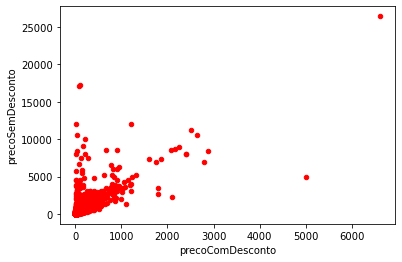

In [5]:
#Compare precoSemDesconto (price without discount) with precoComDesconto (price with discount)
thrift_b.plot(kind='scatter', x='precoComDesconto', y='precoSemDesconto', color='red')

There are two main linear trends in the data. The diagonal trend seems to indicate a discount price that is about 70-75% lesser than the full price. For instance, at y(precoSemDesconto)=5000; while on x(precoComDesconto)≈1125-1500.
Let's explore this data further.

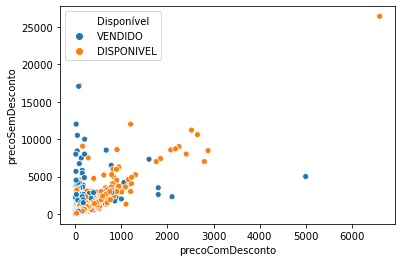

In [13]:
#Add which itens are Disponível (available) or Vendido (sold)
fig = sns.scatterplot(x='precoComDesconto', y='precoSemDesconto', hue='Disponível', data=thrift_b)

This is interesting as well. "Vendido" means sold, while "Disponível" means available.
Pieces of clothing that have been on sale (with discount) seem to have a higher chance of being sold (which makes sense, especially at a 75% sellout as most pieces seem to be).

Let's check how these prices are distributed on a histogram:

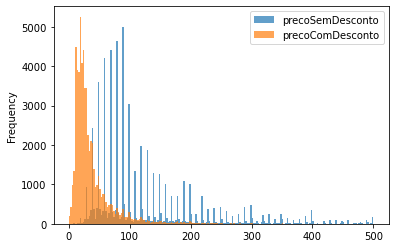

In [14]:
#Histogram to better show the wholeness of data
thrift_b[['precoSemDesconto', 'precoComDesconto']].plot(kind='hist', alpha=0.7, bins=200, range=[0,500])

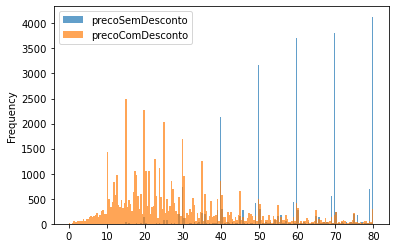

In [15]:
#Let's zoom in on the density peak of the precoComDesconto (Discount prices) to see the details of how the princes are arranged.
thrift_b[['precoSemDesconto', 'precoComDesconto']].plot(kind='hist', alpha=0.7, bins=200, range=[0,80])

Full prices (precoSemDesconto) are usually arranged at every 10 reais. Utilyzing "round numbers-1" may be a good sales pitch. That is, selling something for 79 reais instead of 80 reais. Or 89 instead of 90. Or 99 instead of 100. We are psychologycally more prone to relate a 99 reais price to a 90 reais rather than to 100 reais, even though the actual price is 9x closer to 100 reais rather than 90.
Also, discount prices also tend to cluster similarly to full prices (every 10 reais, buy with a 9 at as the second number). However, discount prices may also tend to occur at the fifths (25, 35, 45 reais, for instance).

Next step. Let's see which are the most popular types of clothing in Thrift Store B.

In [16]:
#How much of each thing do you have
thrift_b.groupby('PalavraChave1')['id'].count()

PalavraChave1
.Camiseta      1
Acessório      1
Agasalho       5
Alcinha       50
Alcinhas       1
            ... 
shorts         1
vestido        1
Ãculos        1
Óculos       224
óculos         2
Name: id, Length: 463, dtype: int64

In [17]:
#Count and order by decreasing number of items. 
#To do that, slice a series and sort it. Showing the 20 largest keyitems.
thrift_b_count = thrift_b.groupby('PalavraChave1')['PalavraChave1'].count().nlargest(20)
print(thrift_b_count)

PalavraChave1
Vestido     10494
Calça        6645
Blusa        5419
Camisa       3976
Saia         3920
Blusinha     3443
Camiseta     2652
Shorts       1841
Regata       1750
Casaco       1030
Bermuda       954
Blazer        953
Sandália      846
Jaqueta       795
Bolsa         762
Body          716
Suéter        680
Sapato        679
Bata          578
Colete        551
Name: PalavraChave1, dtype: int64


These are the top 20 pieces of clothing being sold (and having been sold) at Thrift Store B.
It diverges considerably from the wordcloud made previously, showing that the wordcloud algorhythm was not working properly for this. Indeed, some NLP will be required later to extract more information from this data. I trust that the interested reader will look for the portuguese words in the bilingual dictionary (www.google.com) if there are any doubts on the meaning of each.

In [86]:
#Assign a column filled with '1' to be further counted and grouped
thrift_b['item'] ='1'

#Since I'm already here, do that for other thrift stores as well
thrift_a['item'] ='1'
thrift_c['item'] ='1'

print(thrift_a.columns)
print(thrift_b.columns)
print(thrift_c.columns)

Index(['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto',
       'Desconto', 'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Composicao',
       'Medidas', 'Disponível', 'Data', 'Status', 'PalavraChave1',
       'PalavraChave2', 'PalavraChave3', 'PalavraChave4', 'PalavraChave5',
       'PalavraChave6', 'PalavraChave7', 'PalavraChave8', 'item'],
      dtype='object')
Index(['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto',
       'Desconto', 'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Composicao',
       'Medidas', 'Disponível', 'Data', 'Status', 'PalavraChave1',
       'PalavraChave2', 'PalavraChave3', 'PalavraChave4', 'PalavraChave5',
       'PalavraChave6', 'PalavraChave7', 'PalavraChave8', 'item'],
      dtype='object')
Index(['id', 'marca', 'nomeDaPeca', 'precoComDesconto', 'precoSemDesconto',
       'Desconto', 'Descricao', 'Tamanho', 'Condicao', 'Cores', 'Composicao',
       'Medidas', 'Disponível', 'Data', 'Status', 'PalavraChave1',
       'P

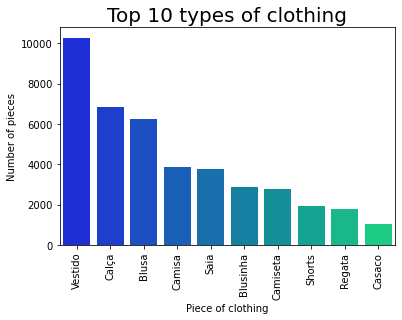

In [18]:
#Histogram the previous data
x = pd.DataFrame(thrift_b.groupby(['PalavraChave1'])['id'].sum().reset_index())
x.sort_values(by = ['id'], ascending = False, inplace = True)

sns.barplot(x['PalavraChave1'].head(10), y = (x['id'].head(10))*0.00002, data = x, palette = 'winter')
plt.title('Top 10 types of clothing', fontsize = 20)
plt.xlabel('Piece of clothing')
plt.xticks(rotation = 90)
plt.ylabel('Number of pieces')
plt.show()

Great! 
Let's go back to analysing discounts. 

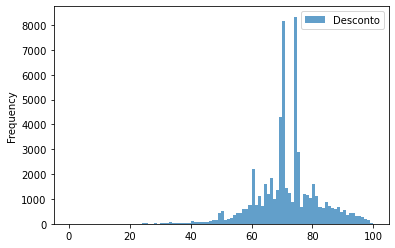

In [19]:
#Divide one column for the other to obtain % of discount
thrift_b['Desconto'] = 100-((thrift_b['precoComDesconto']/thrift_b['precoSemDesconto'])*100)
thrift_b[['Desconto']].plot(kind='hist', alpha=0.7, bins=100, range=[0,100])

Indeed, most discount seem to occur at the 70-75% range.
Now, let's see how the discount prices are distributed among specific pieces of clothing.

Text(0.5, 0, 'Óculos')

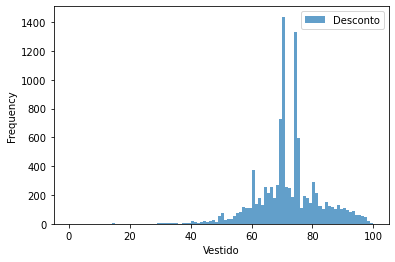

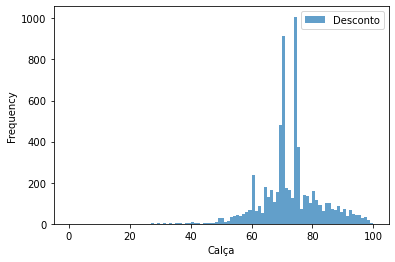

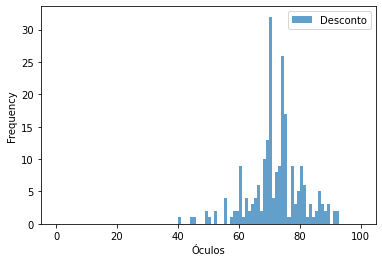

In [20]:
#Show only Vestido (Dress)
subset_vestido = thrift_b[thrift_b.PalavraChave1=='Vestido']
subset_vestido[['Desconto']].plot(kind='hist', alpha=0.7, bins=100, range=[0,100])
plt.xlabel('Vestido')

#Show only Calça (Trousers)
subset_calca = thrift_b[thrift_b.PalavraChave1=='Calça']
subset_calca[['Desconto']].plot(kind='hist', alpha=0.7, bins=100, range=[0,100])
plt.xlabel('Calça')

#Show only Óculos (Spectacles)
subset_oculos = thrift_b[thrift_b.PalavraChave1=='Óculos']
subset_oculos[['Desconto']].plot(kind='hist', alpha=0.7, bins=100, range=[0,100])
plt.xlabel('Óculos')


Discount is given at about the same percentage rate regardless of which type of object is being sold.

Text(0.5, 0, 'Disponível')

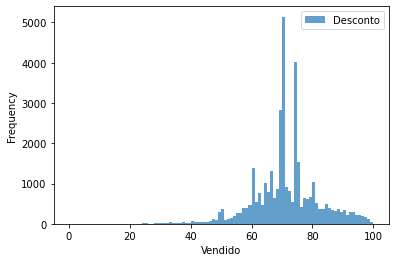

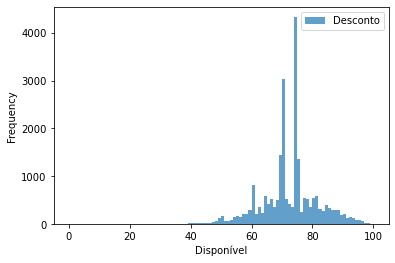

In [21]:
#Show only Vendidos (Sold)
subset_vendido = thrift_b[thrift_b.Disponível=='VENDIDO']
subset_vendido[['Desconto']].plot(kind='hist', alpha=0.7, bins=100, range=[0,100])
plt.xlabel('Vendido')

subset_vendido = thrift_b[thrift_b.Disponível=='DISPONIVEL']
subset_vendido[['Desconto']].plot(kind='hist', alpha=0.7, bins=100, range=[0,100])
plt.xlabel('Disponível')

Discount also does not seem to be a factor for differing which pieces have been sold (Vendido) and which pieces are still available (Disponível). In fact, there seems to be a general proportion between objects sold and available, as Thrift Stores might reasonably showcase new products at about the same rate that the products from the former batch have been sold.

## Exploratory data analysis: Thrift Stores A and C

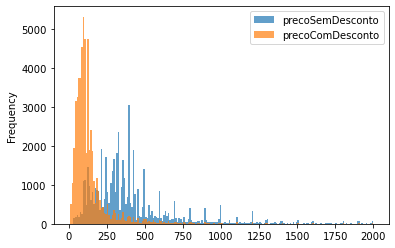

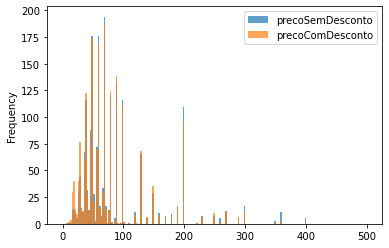

In [33]:
#Histogram to better show the wholeness of data
thrift_a[['precoSemDesconto', 'precoComDesconto']].plot(kind='hist', alpha=0.7, bins=200, range=[0,2000])
thrift_c[['precoSemDesconto', 'precoComDesconto']].plot(kind='hist', alpha=0.7, bins=200, range=[0,500])
#Thrift_a seems posher than others. And it seems to give the most amount of discounts. Let's see.
#On the other hand, on thrift_c, there is almost no difference between "Price with discount" and "without discount".
#Therefore, it is possible to merge all thrift_store data together; however, it would probably become a jumbled mess, since all three stores have different characteristics from each other


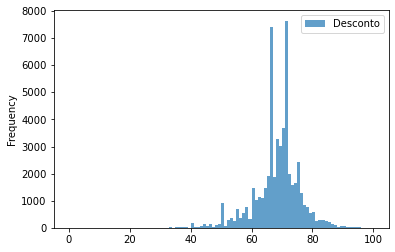

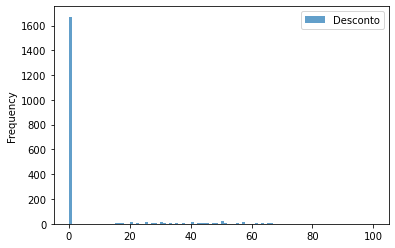

In [112]:
thrift_a[['Desconto']].plot(kind='hist', alpha=0.7, bins=100, range=[0,100])
thrift_c[['Desconto']].plot(kind='hist', alpha=0.7, bins=100, range=[0,100])
#Something is different on thrift_c.

In [63]:
#Lets analyse some real numbers
print('Thrift A')
print(thrift_a.describe())
print('\n')

print('Thrift B')
print(thrift_b.describe())
print('\n')

print('Thrift C')
print(thrift_c.describe())
print('\n')

print('Thrift A+B+C')
print(thrift_abc.describe())

Thrift A
                  id  precoComDesconto  precoSemDesconto      Desconto  \
count   56661.000000      56661.000000      54347.000000  54347.000000   
mean    48153.907997        154.315458        505.941029     68.252088   
std     28231.414985        295.597504        814.536897     18.083930   
min      1957.000000          1.000000          0.400000  -3650.000000   
25%     22717.000000         70.000000        224.500000     65.714286   
50%     48276.000000        100.000000        340.000000     69.230769   
75%     72721.000000        144.000000        490.000000     71.887550   
max    102089.000000      23000.000000      27000.000000     99.821429   

       Composicao  Medidas  PalavraChave8  
count         0.0      0.0            0.0  
mean          NaN      NaN            NaN  
std           NaN      NaN            NaN  
min           NaN      NaN            NaN  
25%           NaN      NaN            NaN  
50%           NaN      NaN            NaN  
75%           Na

On the descriptive statistics summary, tbe only fields that shall be considered are precoComDesconto (discount prices), precoSemDesconto (full prices) and Desconto (discount in %).

In [91]:
#Let's analise only dresses (Vestido) now.
thrift_b_Vestido = thrift_b.loc[thrift_b.PalavraChave1=='Vestido']
thrift_b_Vestido


,id,marca,nomeDaPeca,precoComDesconto,precoSemDesconto,Desconto,Descricao,Tamanho,Condicao,Cores,...,Status,PalavraChave1,PalavraChave2,PalavraChave3,PalavraChave4,PalavraChave5,PalavraChave6,PalavraChave7,PalavraChave8,item
1,60509,mob,Vestido Camisa Xadrez Mob,139.97,449.90,68.888642,"Vestido camisa xadrez, com mangas 7/8. Bolsos ...",m,gentilmente usada,colorido,...,VERIFICADO,Vestido,Camisa,Xadrez,Mob,,,,,1
2,42602,farm,Vestido Verde Militar Farm,74.70,249.00,70.000000,"Vestido Farm cor verde militar, comprimento cu...",p,nova com etiqueta,verde,...,VERIFICADO,Vestido,Verde,Militar,Farm,,,,,1
4,60624,zara,Vestido Laranja com Bolinhas Azuis,26.21,189.90,86.197999,"Vestido reto de tecido plano laranja escuro, c...",pp,gentilmente usada,laranja,...,VERIFICADO,Vestido,Laranja,com,Bolinhas,Azuis,,,,1
22,63470,msp,Vestido Reto Listrado MSP,32.50,109.99,70.451859,Vestido feminino MSP . Tecido plano listrado c...,38,gentilmente usada,colorido,...,VERIFICADO,Vestido,Reto,Listrado,MSP,,,,,1
24,24337,le ricard,Vestido Godê Onça,27.60,69.90,60.515021,"Vestido com estampa de onça, modelagem godê, r...",p,nova com etiqueta,colorido,...,VERIFICADO,Vestido,Godê,Onça,,,,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60278,78569,zinzi,Vestido Azul E Preto Zinzi,23.70,79.00,70.000000,"Vestido, busto azul e saia preta, da marca Zin...",p,gentilmente usada,azul,...,VERIFICADO,Vestido,Azul,E,Preto,Zinzi,,,,1
60279,49105,blue banana,Vestido Preto Tomara que Caia,152.00,380.00,60.000000,"Vestido com decote tomara que caia, modelagem ...",p,gentilmente usada,preto,...,VERIFICADO,Vestido,Preto,Tomara,que,Caia,,,,1
60287,69614,pako's,Vestido Pako's Malha Preta,30.00,69.90,57.081545,"Vestido Pako's, de modelagem ampla, em malha p...",p,gentilmente usada,preto,...,VERIFICADO,Vestido,Pako's,Malha,Preta,,,,,1
60289,67762,iódice,Vestido Preto Iódice Drapeado,63.21,350.00,81.940000,"Vestido Preto, de modelagem ampla, em malha ac...",p,gentilmente usada,preto,...,VERIFICADO,Vestido,Preto,Iódice,Drapeado,,,,,1


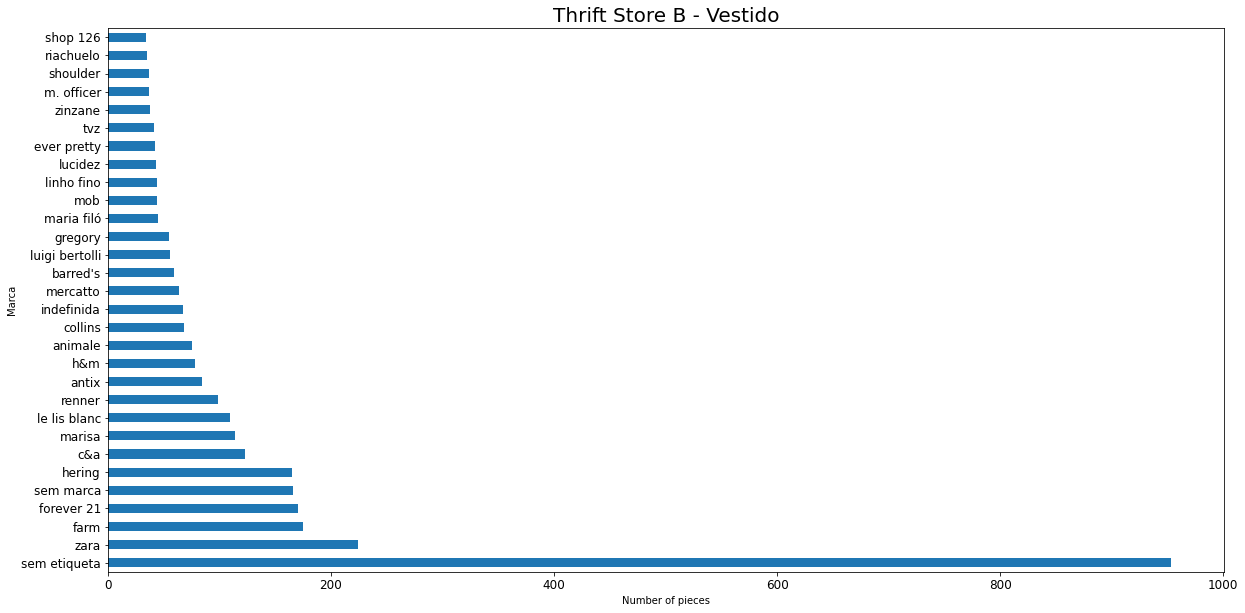

In [115]:
thrift_b_Vestido['marca'].value_counts().head(30).plot(kind='barh', figsize=(20,10), fontsize=12)
plt.title('Thrift Store B - Vestido', fontsize = 20)
plt.ylabel('Marca')
plt.xlabel('Number of pieces')
plt.show()

In [107]:
x2 = thrift_b_Vestido['marca'].value_counts().head(30)
print(x2)

sem etiqueta      953
zara              224
farm              175
forever 21        170
sem marca         166
hering            165
c&a               123
marisa            114
le lis blanc      109
renner             99
antix              84
h&m                78
animale            75
collins            68
indefinida         67
mercatto           64
barred's           59
luigi bertolli     56
gregory            55
maria filó         45
mob                44
linho fino         44
lucidez            43
ever pretty        42
tvz                41
zinzane            38
m. officer         37
shoulder           37
riachuelo          35
shop 126           34
Name: marca, dtype: int64


Tags "sem etiqueta" and "sem marca" would mean "no tag" and "no brand" respectively.

Let's resume the objectives of this project: to perform a statistical analysis that will help businesses decisions in a newly opened thrift store.
 
### Conclusions from Exploratory Data Analysis

- Thrift A displays a similar discount pattern to Thrift B, with most products ranging from 65-72%. Coincidentally or not, the median for Thrift Stores A discount prices is exactly 100 reais. It is also the most expensive store (A=100,00; B=25,90; C=59,00).
- Thrift B has the cheaper prices. It also has the most amounts of items in the dataset, which might indicate either that:
    - The sales have been well, probably prompted by the good prices, or that
    - Thrift Store B is just the oldest of all thrift store and it has been on the market for a longer period of time.
- Thrift C, on the other hand, has a different sales schema from the other thrift stores, in the sense that it barely puts discount on products. From our initial analysis, we saw that Thrift Store C may be somewhat more "hipster" than the former two thrift stores. It might have a different market strategy. Most pieces of clothing were purchased in Buenos Aires (Argentina). Also, Condicao (condition) field from Thrift Store C, instead of stating whether the piece of clothing is in a good state or not, it just says "Vintage" for all instances. "Vintage" is a term for trendy, oldfashioned clothes. This might indicate that Thrift Store C appeals to a very specific, smaller niche of costumers. Those characteristics do not necessarily indicate that the store is successful or not. It also does not mean that Thrift Store C is more expensive, since it actually has an intermediate price between Thrift Store B and A. But Thrift Store C indeed contains the least amount of items of all three stores, which means either that: 
    - The products showcased at the Thrift Store C were replaced at a lesser rate than in the other thrift stores, which might indicate that the sales haven't been so well, or that
    - Thrift Store C is relatively new, so it hasn't sold as many products as the other stores. 
    If the former supposition is the case, then Thrift Store C ends up being the least profitful of all Thrift Stores (which does not necessarily mean that it is the least successful, since success is completely relative to what your objectives are as an entrepreneur).
 
### Recommendations for future datasets

The dataset would be considerably more useful, businesswise, if it had:
- The price that the Thrift Stores paid for each product before they were put on sale, which would allow us to calculate the profit.
- The correct dates for the price transactions.
- Customer data: especially gender and age.



## 3. Natural Language Processing (NLP)
We use some basic NLP techniques to extract more information from the Thrift Store datasets.


### Wordcloud

First, Let's evaluate which were the most commonly used words in the description by exhibiting a "wordcloud", as a preview to our NLP.
We shall also eliminate common propositions in portuguese, and focus on nouns and adjectives that tend to better characterise the objects we are evaluating.

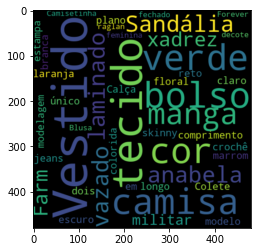

In [6]:
#WordCloud para Descriçao (detailed description)
descricao_text = str(thrift_b.Descricao)
wordcloud = WordCloud(width=480, height=480, margin=0, stopwords=['da', 'do', 'de', 'cu', 'na','length', 'Descricao','Name','dtype','object','com', 'fe', 'bol', 'regiÃ']).generate(descricao_text)
plt.imshow(wordcloud, interpolation='bilinear')


Fine. Now let's apply wordcloud for the first order keyword (which would correspond to the main nouns in the dataset).

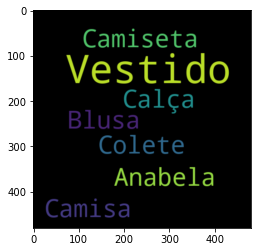

In [8]:
#WordCloud para PalavraChave1
PalavraChave1_text = str(thrift_b.PalavraChave1)
wordcloud2 = WordCloud(width=480, height=480, margin=0, stopwords=['Name', 'Length','dtype', 'PalavraChave1', 'object']).generate(PalavraChave1_text)
plt.imshow(wordcloud2, interpolation='bilinear')

That does not seem to work well given that, intuitivelly, it is much harder to imagine that "Anabela" (a specific type of sandal) and "Colete" (waistcoat) would have the same weight as standard pieces of clothing such as "Calça" (trousers *aka in US* pants) and "Camisa" (shirt). 

Also, as we have seen previously, the most common pieces of clothing in Thrift Store B are: Vestido, Calça, Blusa, Camisa, Saia, Blusinha... And so on, which is incompatible, at least in this instance, with the results obtained via wordcloud.

### Bag-of-Words

#### Defining a new categorical variable
We will first establish a new categorical data to divide our data into "caro" (expensive) and "barato" (cheap). To define which one is which, we will first get the median for each dataset. In the real world, we would probably define which values are expensive or cheap depending on the values we have in our pocket. However, in our simulated world, we will artifically define this boundary so that we can simmetrically divide our datasets. The values above the median will be defined as expensive; the values below the median will be defined as cheap. 

Firstly, we will only analyse the data on Thrift Store B to avoid descriptive difference that would be inherent from the different stores we're modelling.
- Caro = 1
- Barato = 0

In [10]:
#Let's create the new column and fill it with zeros
thrift_b["cost"] = 0
print(thrift_b.columns)

Index(['id', 'marca', 'precoComDesconto', 'precoSemDesconto', 'Descricao',
       'Tamanho', 'Condicao', 'Cores', 'Composicao', 'Medidas', 'Disponível',
       'Data', 'Status', 'PalavraChave1', 'PalavraChave2', 'PalavraChave3',
       'PalavraChave4', 'PalavraChave5', 'PalavraChave6', 'PalavraChave7',
       'PalavraChave8', 'cost'],
      dtype='object')


In [17]:
margin = 100
margin

100

In [154]:
#create a function that operates on the rows of the dataframe:
def f(row):
    if row['precoComDesconto'] >= 100:
        val = 1 #caro
    else:
        val = 0 #barato
    return val

In [155]:
thrift_b['cost'] = thrift_b.apply(f, axis=1)
thrift_b

,id,marca,precoComDesconto,precoSemDesconto,Descricao,Tamanho,Condicao,Cores,Composicao,Medidas,...,Status,PalavraChave1,PalavraChave2,PalavraChave3,PalavraChave4,PalavraChave5,PalavraChave6,PalavraChave7,PalavraChave8,cost
0,24427,nativa,49.99,100.00,"Sandália anabela de tecido laminado vazado, fe...",37,gentilmente usada,laranja,Tecido laminado,Salto - 12cm,...,VERIFICADO,Anabela,Laço,Laranja,,,,,,0
1,60509,mob,139.97,449.90,"Vestido camisa xadrez, com mangas 7/8. Bolsos ...",m,gentilmente usada,colorido,55% linho 45% algodão,Busto: 48 cm Cintura: 44 cm Quadril: 48 cm Com...,...,VERIFICADO,Vestido,Camisa,Xadrez,Mob,,,,,1
2,42602,farm,74.70,249.00,"Vestido Farm cor verde militar, comprimento cu...",p,nova com etiqueta,verde,100% poliéster,Busto: 40 cm Cintura: 32 cm Quadril: 42 cm Com...,...,VERIFICADO,Vestido,Verde,Militar,Farm,,,,,0
3,41552,pure knite,25.25,135.00,"Colete em crochê, cor marrom claro, modelo com...",m,gentilmente usada,marrom,sem etiqueta,Busto: 53 cm Cintura: 60 cm Quadril: 68 cm,...,VERIFICADO,Colete,de,Crochê,Marrom,Claro,,,,0
4,60624,zara,26.21,189.90,"Vestido reto de tecido plano laranja escuro, c...",pp,gentilmente usada,laranja,100% poliéster,Busto: 44 cm Cintura: 46 cm Quadril: 50 cm Com...,...,VERIFICADO,Vestido,Laranja,com,Bolinhas,Azuis,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60290,50079,clock house,27.20,80.00,"Calça jeans com modelagem skinny, com dois bol...",44,gentilmente usada,azul,sem etiqueta,Cintura: 44 cm Quadril: 52 cm Comprimento: 107 cm,...,VERIFICADO,Calça,Jeans,Skinny,Clock,House,,,,0
60291,38714,magia,21.48,85.90,"Vestido longo, com estampa floral colorida, da...",m,gentilmente usada,colorido,87% poliamida 13% elastano,Busto: 39 cm Cintura: 37 cm Quadril: 59 cm Com...,...,VERIFICADO,Vestido,Longo,Floral,Magia,,,,,0
60292,41740,zara,27.00,89.99,"Camisa branca, com bolso único na regiÃ£o do t...",18m,gentilmente usada,branco,80% AlgodÃ£o 20% Linho,Busto: 30 cm Cintura: 30 cm Comprimento: 35 cm,...,VERIFICADO,Camisa,Branca,Zara,,,,,,0
60293,35819,oshkosh,10.00,29.99,"Camisetinha raglan com decote fechado, manga c...",3,gentilmente usada,colorido,"85% poliéster, 15% elastano","Busto 28cm, cintura 26cm, comp 38cm",...,VERIFICADO,Camiseta,Infantil,Raglan,,,,,,0


### Training and testing data

In [35]:
#Finally, let's import sklearn
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

scikit-learn version: 0.23.1


In [156]:
#Let's split the data into training and test sets
from sklearn.model_selection import train_test_split
text_train, text_test, y_train, y_test = train_test_split(thrift_b['Descricao'], thrift_b['cost'], random_state=0)

In [157]:
print("text_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

text_train shape: (45221, 11783)
y_train shape: (45221,)


In [46]:
#The split usually puts 75% of data in the training data, and 25% at the test data
print("text_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

text_test shape: (15074,)
y_test shape: (15074,)


In [158]:
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

type of text_train: <class 'pandas.core.series.Series'>
length of text_train: 45221
text_train[1]:
Vestido camisa xadrez, com mangas 7/8. Bolsos laterais, faixa na cintura e abotoamento simples. Tamanho M.


In [159]:
print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [42773  2448]


In [122]:
#Do the same for test dataset
print("type of text_test: {}".format(type(text_test)))
print("type of y_train: {}".format(type(y_train)))
print("type of y_test: {}".format(type(y_test)))

type of text_test: <class 'pandas.core.series.Series'>
type of y_train: <class 'pandas.core.series.Series'>
type of y_test: <class 'pandas.core.series.Series'>


Tokenization

In [67]:
#let's use a transformer called CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [160]:
#Transform to unicode string
X_train = vect.fit_transform(text_train.values.astype('U'))
print("X_train:\n{}".format(repr(X_train)))

X_train:
<45221x11783 sparse matrix of type '<class 'numpy.int64'>'
	with 764555 stored elements in Compressed Sparse Row format>


In [161]:
# Use get_feature_names method
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 1000 to 1030:\n{}".format(feature_names[1000:1030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 11783
First 20 features:
['00', '000', '001', '00p', '01', '02', '03', '04', '05', '06', '08', '0p', '10', '100', '100cm', '100cmx', '100x100', '101', '101cm', '102']
Features 1000 to 1030:
['apostando', 'aposte', 'apostrofe', 'apoá', 'apparel', 'apparels', 'apple', 'apresenta', 'apresentações', 'aprofundado', 'apropriada', 'apropriado', 'aproveita', 'aproveite', 'aproximadamente', 'apt9', 'aqua', 'aquamar', 'aquarela', 'aquario', 'aquela', 'aquele', 'ar', 'arabesco', 'arabescos', 'arabestos', 'aracaju', 'arallope', 'arame', 'aramell']
Every 2000th feature:
['00', 'bunch', 'ellya', 'joshua', 'omni', 'silk']


In [162]:
#Let's build a classifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean cross-validation accuracy: 0.95


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [163]:
#We obtained 95%, which is not ideal to say the least.
#Let's try to tune the C parameter of the LinearRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best cross-validation score: 0.95
Best parameters:  {'C': 1}


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [166]:
#generalised performance
print("{:.2f}".format(grid.score(X_train, y_train)))

0.95


In [167]:
X_test = vect.transform(text_test.values.astype('U'))

In [168]:
#It's important to fit the X-test and y_test into the same grid

grid.fit(X_test, y_test)

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [169]:
print("{:.2f}".format(grid.score(X_test, y_test)))

0.95


So, that is what we've got! 75% in the test dataset. We certainly could improve the extraction of words.
Whenever we change the value that we divide `caro`and `barato`, we usually get an improvement in this value, until it starts to descend due to the lack of available samples.

So, when the value of the dataset is:
- 25.90 reais (which is the median) -> 75 %
- 100.00 reais -> 95 %

I could certainly write a pipeline to know how to distribute the values that I use to define which valueas are `caro` and `barato`.

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [184]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)

Let's quit for now, folks! We're back tomorrow.